# Homework 10: Random Numbers (20 points)

Group Members: Julius Franke (el442, juliusttf@gmail.com), Erik Meister (kd400, erik.meister@me.com), Eugen Dizer (qo452, eugen9898@web.de)

Due on Friday, 03.07.2020.

In [1]:
#Load standard libraries
import numpy as np   
import matplotlib.pyplot as plt

%matplotlib inline

Consider a probability distribution function $p(x)$ given in the domain $[0, a\rangle$ by
$$ p(x) = bx .$$
Assume that $\lbrace r_i\rbrace$ is a random set of numbers, distributed uniformly between 0 and 1.

### 1. Give the proper value of $b$ as a function of a such that the probability distribution function is properly normalized.

As one can see easily from the condition
$$ \int_0^a bx \ dx = 1 $$
the proper value for $b$ is $b = \frac{2}{a^2}$.

### 2. Use the rejection method to make a set $\lbrace x_i \rbrace$ that obeys the above distribution for $a = 0.5$.

In [23]:
def random_number(n):
    # Use rejection method with a = 0.5 and p(x) = 8 * x.
    random_numbers = []
    while len(random_numbers) < n:
        # Generate first random number between 0 and 1
        r = np.random.rand(1)
        x = 0.5 * r
        # Generate second random number between 0 and 1
        s = np.random.rand(1)
        if s < 8 * x:
            random_numbers.append(r[0])

    return random_numbers

### 3. Make a histogram of the resulting numbers and check that the histogram indeed follows the probability density. Experiment with the size of the set (the number of random numbers drawn), to find out how large you have to make it to get (by eye) a reasonable fit.

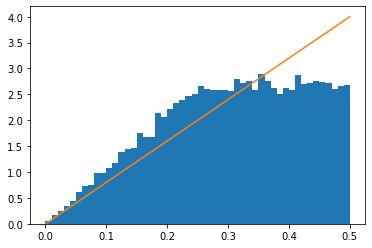

In [22]:
data = random_number(50000) #random_number(5000)

plt.hist(data, density=True, bins=50, range=(0,0.5))
plt.plot(np.linspace(0, 0.5, 5), 8 * np.linspace(0, 0.5, 5))
plt.show()

Somehow it doesn't work... With the function $2x$ it would be better.

### 4. Compute the number π using a rejection method with the function $f(x) = \sqrt(1 - x^2)$, for $0 \leq x \leq 1$. Hint: It is enough to use only one quadrant $x, f(x) > 0$. Vary the number of RNs widely (orders of magnitude) and plot the accuracy of the result as a function of the number of RNs. Use logarithmic variables for the plot.

In [6]:
def random_number_pi(n):
    # Use rejection method with a = 0.5 and p(x) = 8 * x.
    N_total = 0
    N_rejected = 0
    random_numbers = []
    while len(random_numbers) < n:
        # Generate first random number between 0 and 1
        r = np.random.rand(1)
        # Generate second random number between 0 and 1
        s = np.random.rand(1)
        if s < np.sqrt(1-r**2):
            random_numbers.append(r[0])
            N_total += 1
        else:
            N_rejected += 1
            N_total += 1

    return 1 - N_rejected / N_total # this should return pi/4

In [8]:
print(4 * random_number_pi(600000))

3.139397078791018


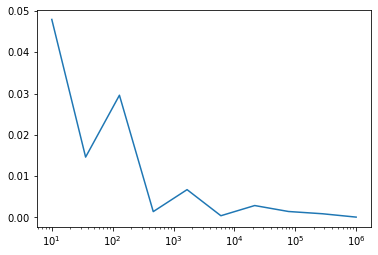

In [14]:
n = np.logspace(1, 6, 10)
results = []
for i in n:
    results.append(random_number_pi(i))
    
results = np.array(results)

plt.plot(n, np.abs(np.pi/4 - results))
plt.xscale("log")
plt.show()